<a href="https://colab.research.google.com/github/ConstanzaGarciaOsses/ProyectoFinal---Suicidios/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
# ------------------------------- PROYECTO FINAL: TEMA: SUICIDIOS ------------------------------- #

In [273]:
# Primero, cargaremos todas las librerias necesarias para trabajar en nuestro proyecto final. Entiendo que
# puedo estar cargando mas de lo necesario, pero en estas circunstancias es mejor que sobre a que falte.

In [274]:
# Importar las librerias más que necesarias:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [275]:
# A continuacion cargaremos las bases de datos. En esta primera instancia, cargaré mas de una porque
# quiero primero explorar los datos antes de tomar la decision sobre cuál trabajar.

In [276]:
# ===================== Primera base de datos: Suicidios en China ===================== #

In [277]:
df_China = pd.read_csv("/content/SuicideChina.csv")

In [278]:
df_China.head()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [279]:
df_China.shape

(2571, 12)

In [280]:
df_China.duplicated().sum()

0

In [281]:
df_China.isna().sum()

Unnamed: 0      0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64

In [282]:
df_China.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [283]:
df_China["method"].value_counts()

Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64

In [284]:
df_China["Died"].value_counts()

no     1315
yes    1256
Name: Died, dtype: int64

In [285]:
df_China["Year"].value_counts()

2010    956
2011    866
2009    749
Name: Year, dtype: int64

In [286]:
df_China["Sex"].value_counts()

female    1328
male      1243
Name: Sex, dtype: int64

In [287]:
df_China["Age"].describe()

count    2571.000000
mean       52.630883
std        19.783878
min        12.000000
25%        37.000000
50%        53.000000
75%        69.000000
max       100.000000
Name: Age, dtype: float64

In [288]:
# Me resulta bastante interesante este dataset.

In [289]:
# ===================== Segunda base de datos: Suicidios Rate ===================== #

In [290]:
df_rate = pd.read_csv("/content/Suicide_Rate.csv")

In [291]:
df_rate.head()

,ParentLocation,Location,Period,Sex,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
0,Africa,Angola,2019,Both sexes,12.55,7.70,19.43
1,Africa,Angola,2019,Male,21.71,13.48,33.23
2,Africa,Angola,2019,Female,4.68,2.74,7.49
3,Africa,Angola,2018,Both sexes,12.35,7.58,19.05
4,Africa,Angola,2018,Male,21.28,13.21,32.49


In [292]:
df_rate["ParentLocation"].value_counts()

Europe                   3000
Africa                   2820
Americas                 1980
Eastern Mediterranean    1260
Western Pacific          1260
South-East Asia           660
Name: ParentLocation, dtype: int64

In [293]:
df_rate.loc[(df_rate['Location'] == "China")].describe()

,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
count,60.000000,60.000000,60.000000,60.000000
mean,2009.500000,10.030833,7.924500,12.043000
std,5.814943,3.017365,2.140704,3.465703
min,2000.000000,4.800000,3.760000,5.940000
25%,2004.750000,7.575000,6.290000,9.060000
50%,2009.500000,9.825000,8.090000,12.050000
75%,2014.250000,12.530000,9.900000,14.892500
max,2019.000000,15.480000,12.640000,18.030000


In [294]:
# En este codigo que no me gustó tanto tengo 60 datos de China. Pero las demas columnas siento que
# no me proporcionan informacion relevante que pudiera añadir al database original.

In [295]:
# ===================== Segunda base de datos: Master (suicidios) ===================== #

In [296]:
df_master = pd.read_csv("/content/master.csv")

In [297]:
df_master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [298]:
df_master.info() # Tengo informacion perdida de la variable HDI for year.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [299]:
df_master.shape

(27820, 12)

In [300]:
df_master["country"].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [301]:
df_master.loc[(df_master['country'] == "China")].describe() # Mucha informacion perdida para los datos de China.

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
df_master["year"].value_counts()

2009    1068
2010    1056
2001    1056
2002    1032
2000    1032
2011    1032
2007    1032
2003    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1997     924
1996     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [303]:
# Pense que podia de alguna forma vincular esta base de datos con la de los suicidios en China, pero no me
# reconoce el pais China cuando intento buscarlo.

In [304]:
" ===================== Conclusion: Suicidios en China ===================== "

# Una vez explorada las bases de datos, la decision final es que se va a trabajar sobre la base que se
# titula Suicidios en China.

' ===================== Conclusion: Suicidios en China ===================== '

In [305]:
# ****************************************************************************************************************
# ===================================== Primera parte: Revision de la Data ===================================== #
# ****************************************************************************************************************

In [306]:
df = pd.read_csv("/content/SuicideChina.csv")

In [307]:
df.head(10)

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
5,6,6,no,yes,no,2009,11,male,62,iliterate,farming,Pesticide
6,7,7,no,yes,no,2010,1,female,90,iliterate,farming,Pesticide
7,8,8,yes,no,no,2010,10,male,54,Secondary,farming,Pesticide
8,9,9,no,yes,no,2010,7,male,66,primary,farming,Hanging
9,10,10,yes,no,no,2011,1,female,30,Secondary,others/unknown,Poison unspec


In [308]:
# Este es un primer vistazo al dataset en donde observamos en primera instancia que tenemos un par de columnas
# que no nos aporta mucho para la investigación ademas de estar duplicadas.
# La mayoria de las variables son categoricas facilmente transformables a numerica.

In [309]:
df.shape

(2571, 12)

In [310]:
 # Estamos trabajando sobre 2571 filas y 12 columnas

In [311]:
df["Hospitalised"].value_counts()

yes    1553
no     1018
Name: Hospitalised, dtype: int64

In [312]:
# Entre las personas que fueron hospitalizadas versus las que no, tenemos una diferencia de 535 personas.

In [313]:
df["Died"].value_counts()

no     1315
yes    1256
Name: Died, dtype: int64

In [314]:
# Es bastante homogeneo la cantidad de personas que fallecieron y las que no, teniendo una diferencia entre ambas de 59.

In [315]:
df["Urban"].value_counts()

no         2213
yes         277
unknown      81
Name: Urban, dtype: int64

In [316]:
# La mayoria de las personas encuestadas pertenecen a la zona rural de Shandong

In [317]:
df["Year"].value_counts()

2010    956
2011    866
2009    749
Name: Year, dtype: int64

In [318]:
# Como se mencionó en un principio, el dataset trabaja sobre los años 2009 al 2011.

In [319]:
df["Month"].value_counts()

6     284
5     263
7     247
9     241
8     229
10    211
2     208
4     208
1     201
3     190
11    153
12    136
Name: Month, dtype: int64

In [320]:
# El patrón de suicidio que sigue en los meses se observará mejor en el grafico que tenemos mas adelante

In [321]:
df["Sex"].value_counts()

female    1328
male      1243
Name: Sex, dtype: int64

In [322]:
# Los suicidios son bastante homogeneos entre hombres y mujeres, predominando un poco estas ultimas por 85 muertes.

In [323]:
df["Age"].describe()

count    2571.000000
mean       52.630883
std        19.783878
min        12.000000
25%        37.000000
50%        53.000000
75%        69.000000
max       100.000000
Name: Age, dtype: float64

In [324]:
# La muestra bastante variada siendo la media de 52,6 años.

In [325]:
df["Education"].value_counts()

Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64

In [326]:
# Aqui claramente predomina la gente que tuvo educacion secundaria. Esto se debe a que la educación
# de los nueve primeros años es gratuita para las zonas rurales desde el año 2007.

In [327]:
df.loc[(df['Education'] == "Secondary") & (df["Occupation"] == "farming")].describe()

,Unnamed: 0,Person_ID,Year,Month,Age
count,990.000000,990.000000,990.000000,990.000000,990.000000
mean,1338.380808,1338.380808,2009.996970,6.382828,41.942424
std,758.982377,758.982377,0.797488,3.169928,15.079758
min,5.000000,5.000000,2009.000000,1.000000,16.000000
25%,654.250000,654.250000,2009.000000,4.000000,28.250000
50%,1382.500000,1382.500000,2010.000000,6.000000,41.000000
75%,2029.500000,2029.500000,2011.000000,9.000000,53.000000
max,2570.000000,2570.000000,2011.000000,12.000000,87.000000


In [328]:
df.loc[(df['Education'] == "primary") & (df["Occupation"] == "farming")].describe()

,Unnamed: 0,Person_ID,Year,Month,Age
count,555.000000,555.000000,555.000000,555.000000,555.000000
mean,1204.340541,1204.340541,2010.061261,6.304505,61.963964
std,709.507739,709.507739,0.767006,3.172404,13.950744
min,2.000000,2.000000,2009.000000,1.000000,15.000000
25%,634.000000,634.000000,2009.000000,4.000000,53.000000
50%,1221.000000,1221.000000,2010.000000,6.000000,62.000000
75%,1767.500000,1767.500000,2011.000000,9.000000,72.000000
max,2571.000000,2571.000000,2011.000000,12.000000,90.000000


In [329]:
# Con lo anterior observado podemos decir que 555 campesinos alcanzaron la educacion primaria y 990
# campesinos alcanzaron la educacion secundaria. Esto, hace un total de 1545 campesinos con educacion de un total
# de 2032 campesinos.

In [330]:
df["Occupation"].value_counts()

farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64

In [331]:
# Aqui tenemos que ordenar un poco los datos. "others" incluirlo en "others/unknow" para evitar duplicidad de categorias.

In [332]:
df["method"].value_counts()

Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64

In [333]:
# Dado que "Others" tiene solo un dato, éste lo incluiremos en "unspecified". Pero algo interesante a mencionar es que
# "Others" no es lo mismo que "unspecified" dado que el "others" puede estar especificado (ser clara la forma de suicidio)
# pero dado que es una forma muy escasa de suicidio, no especificarla, como por ejemplo, inmolarse. Esta, no es una forma
# de suicidio muy comun, sin embargo, es especifica (a eso se refiere el others). De todas formas, dado que es un puro dato
# que cae dentro de esa categoria, no altera nada cambiarla a "unspecified".

In [334]:
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

In [335]:
# Eliminamos las dos columnas que no aportan información al estudio.

In [336]:
df.head() # Observamos como quedó la data

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [337]:
# Lo que haremos a continuacion será graficar cada variable para entender cuál es su comportamiento en la base de datos.

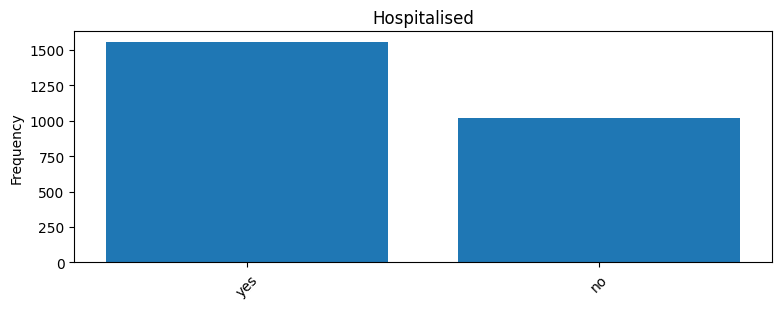

Hospitalised: 
 yes    1553
no     1018
Name: Hospitalised, dtype: int64


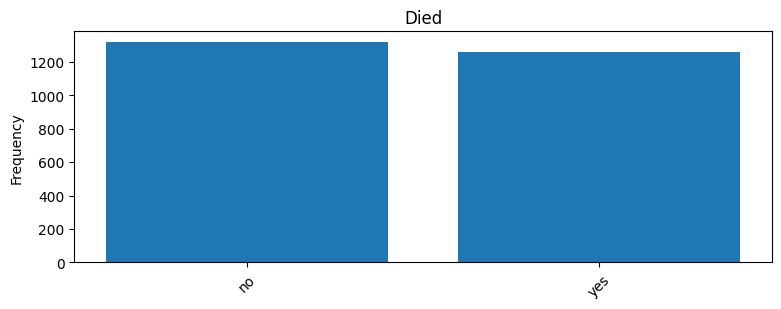

Died: 
 no     1315
yes    1256
Name: Died, dtype: int64


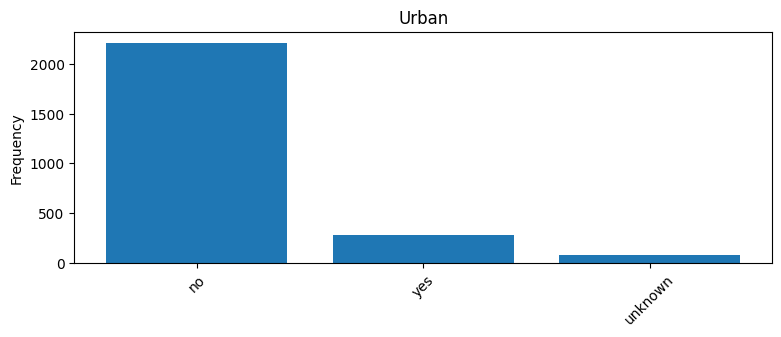

Urban: 
 no         2213
yes         277
unknown      81
Name: Urban, dtype: int64


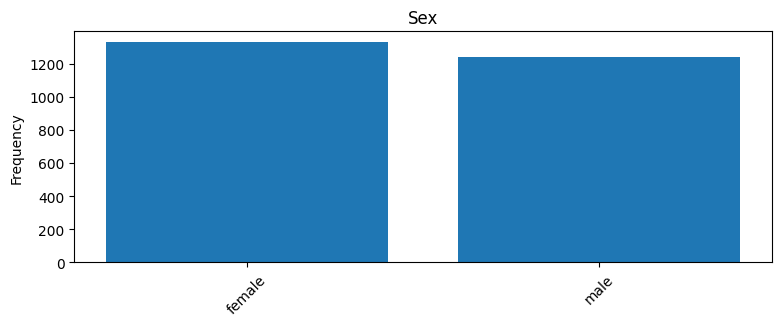

Sex: 
 female    1328
male      1243
Name: Sex, dtype: int64


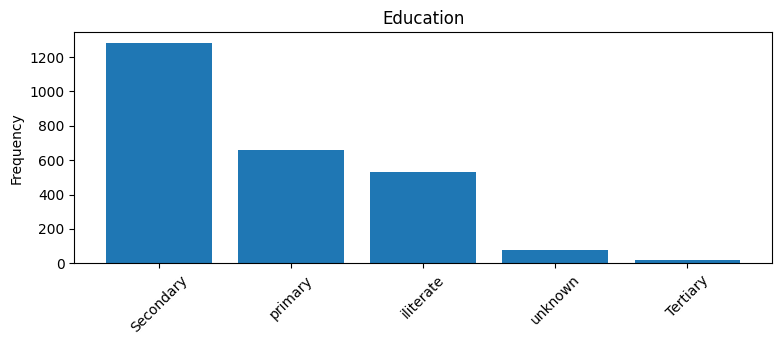

Education: 
 Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64


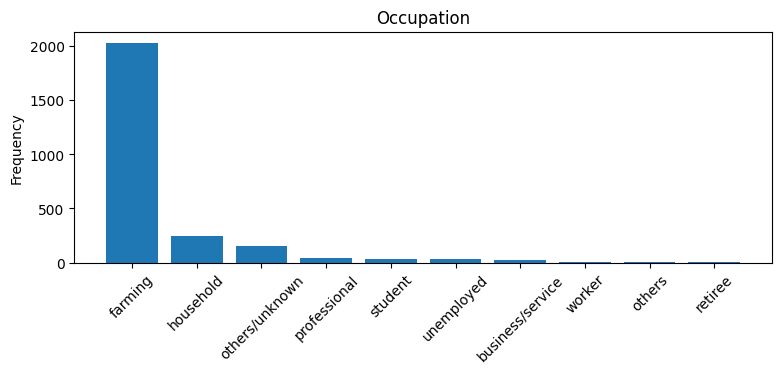

Occupation: 
 farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64


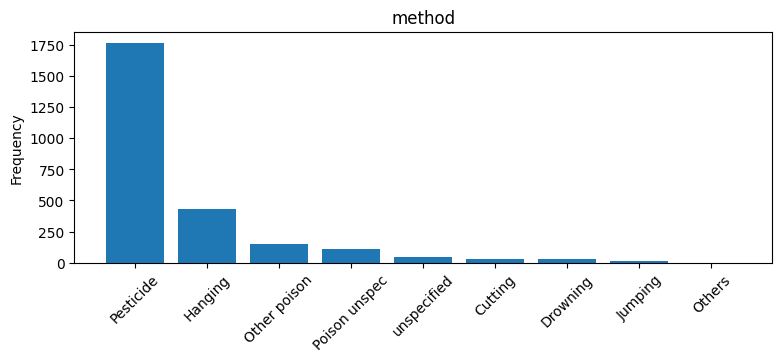

method: 
 Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64


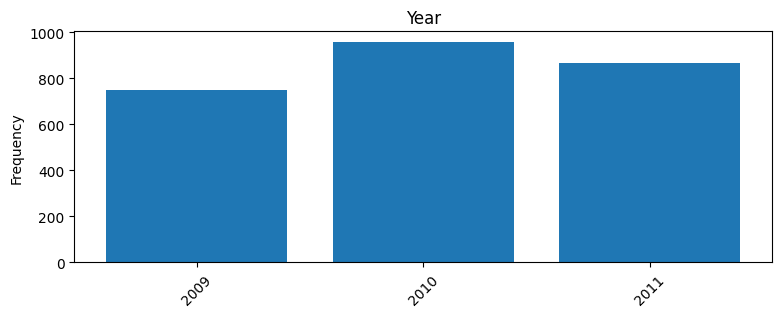

Year: 
 2010    956
2011    866
2009    749
Name: Year, dtype: int64


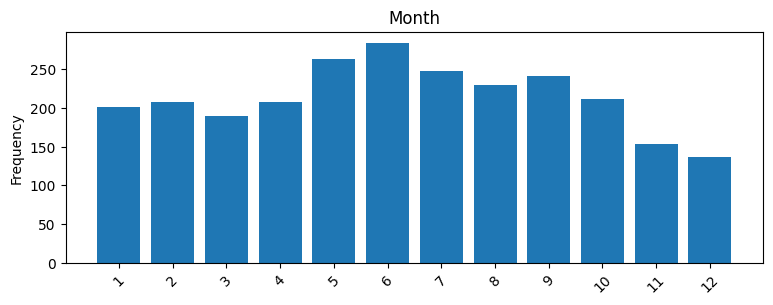

Month: 
 6     284
5     263
7     247
9     241
8     229
10    211
2     208
4     208
1     201
3     190
11    153
12    136
Name: Month, dtype: int64


In [338]:
def bar_plot(variable):

    var = df[variable]
    varValue = var.value_counts()

    #visualizacion
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation = 45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))
category1 = ["Hospitalised","Died","Urban", "Sex", "Education", "Occupation","method", "Year", "Month"]
for c in category1:
    bar_plot(c)

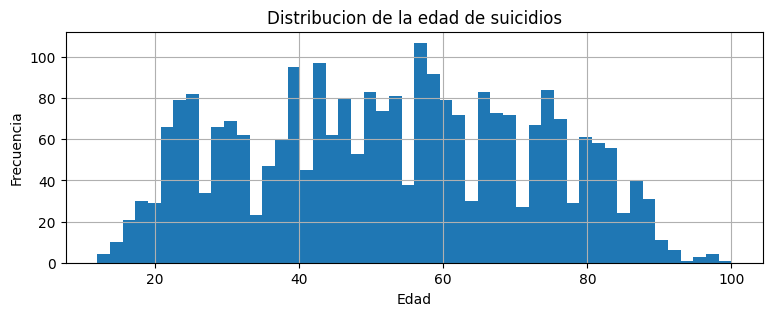

In [339]:
plt.figure(figsize = (9,3))
plt.hist(df["Age"], bins = 50)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribucion de la edad de suicidios")
plt.grid()
plt.show()

In [340]:
# Lo que haremos a continuación será reemplazar aquellas variables categoricas para que sean numericas.
# Esto se hará de forma manual (sin el one-hot-encoder) para tener mayor control sobre las variables
# y no terminar con demasiadas columnas si no que tener las mismas que en un principio pero numericas.
# De esta forma seguimos teniendo control de la información y sigue siendo compacta.

In [341]:
df.head()

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [342]:
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

In [343]:
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

In [344]:
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

In [345]:
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

In [346]:
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

In [347]:
# En este codigo, a diferencua de los anteriores estamos reordenando las categorias. Como se menciono anteriormente,
# "other" será tratado de la misma manera que la categoria "Others/unknow" considerando ademas que son solo 3 datos
# los que se estan reagrupando.

In [348]:
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

In [349]:
# De la misma forma que en el codigo anterior, estamos reagrupando la categoria "Other poison" con "Poison unspec"
# Esto es porque se podría considerar que en la base de datos, al colocar other poison no la estamos especificando
# por lo que para nosotros sería lo mismo que tratarla como poison unspec. Además "Others" es lo mismo, para nosotros
# que decir "unspecified" dado que con others tampoco se esta especificando el metodo de suicidio, por lo que tambien
# la estamos agrupando dentro de la misma categoria.

In [350]:
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [351]:
# Vemos cómo quedó la data.

In [352]:
df.head()

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,0,0,2010,12,1,39,2,2,3
1,0,1,0,2009,3,0,83,1,1,2
2,0,1,0,2010,2,0,60,1,1,2
3,0,1,0,2011,1,0,73,1,1,2
4,1,0,0,2009,8,0,51,2,1,1


In [353]:
# A continuacion realizamos un grafico de correlación para entender que tan fuerte (o debil) correlacionan las
# variables. Pero de antemano ya podemos entender que encontraremos correlaciones fuertes entre hospitalised y died.

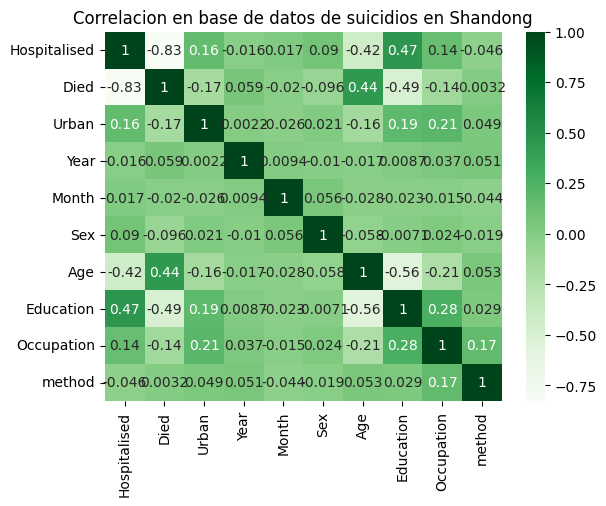

In [354]:
Correlacion = df.corr()
sns.heatmap(Correlacion, cmap='Greens', annot=True)
plt.title("Correlacion en base de datos de suicidios en Shandong")
plt.show()

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Hospitalised  2571 non-null   int64
 1   Died          2571 non-null   int64
 2   Urban         2571 non-null   int64
 3   Year          2571 non-null   int64
 4   Month         2571 non-null   int64
 5   Sex           2571 non-null   int64
 6   Age           2571 non-null   int64
 7   Education     2571 non-null   int64
 8   Occupation    2571 non-null   int64
 9   method        2571 non-null   int64
dtypes: int64(10)
memory usage: 201.0 KB


In [356]:
# Hasta aqui, terminamos de revisar los datos. Estos estan bien, son todos integer, no hay missing
# value, no hay NaN, no hay datos duplicados. Podemos aplicar modelos.

In [357]:
# ****************************************************************************************************************
# ================================ Segunda parte: Metrica y Modelos Aplicados ================================ #
# ****************************************************************************************************************

In [358]:
" ===================== Primer Modelo: Arboles de Decisión ===================== "

' ===================== Primer Modelo: Arboles de Decisión ===================== '

In [359]:
# Correré la base de datos de nuevo y todo lo modificado para comenzar a trabajar con el modelo.

# Cargamos la base de datps
df = pd.read_csv("/content/SuicideChina.csv")

# Eliminamos las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

# Cambiamos las columnas que son categoricas como valores numericos:

# Si fue Hospitalizado o no
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

# Si falleció o no
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

# si vivia en una zona urbana o rural
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

# De qué genero era
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

# La educación que tenía
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

# A qué se dedicaba
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

# El metodo que escogio para cometer suicidio (o intento de suicidio)
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [360]:
# Variable objetivo: "Died"

y = df['Died']
X = df.drop(columns = 'Died')

In [361]:
# Hacemos el test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [362]:
# Aplicamos el modelo de arboles de decision

DecisionTreeClassifier,
dec_tree = DecisionTreeClassifier(random_state = 42)

In [363]:
# Ajustamos el modelo utilizando los datos de entrenamiento

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [364]:
# Predecir los valores objetivos para el conjunto de entrenamiento y de prueba.

train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [365]:
# Y finalmente toca evaluar el modelo:

train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.9984439834024896
0.8444790046656299


In [366]:
# Tenemos un muy buen resultado de este primer modelo. Sigamos revisando otros modelos:

In [367]:
" ===================== Segundo Modelo: Random Forest ===================== "

' ===================== Segundo Modelo: Random Forest ===================== '

In [368]:
# Correré la base de datos de nuevo y todo lo modificado para comenzar a trabajar con el otro modelo.

# Cargamos la base de datps
df = pd.read_csv("/content/SuicideChina.csv")

# Eliminamos las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

# Cambiamos las columnas que son categoricas como valores numericos:

# Si fue Hospitalizado o no
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

# Si falleció o no
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

# si vivia en una zona urbana o rural
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

# De qué genero era
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

# La educación que tenía
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

# A qué se dedicaba
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

# El metodo que escogio para cometer suicidio (o intento de suicidio)
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [369]:
# Ordenaré los datos en matriz de características y vector objetivo

X = df.drop(columns = 'Died')
y = df['Died']

# Divido los datos para la validación

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [370]:
# Aplicamos el modelo

rf = RandomForestClassifier(random_state = 42)

In [371]:
# Vemos hiperparametros

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [372]:
# Aprende relacion entre X e y

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [373]:
# Predecir los valores para y

rf.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [374]:
# Evaluar el modelo

rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9984439834024896
0.8724727838258165


In [375]:
# Aunque estos resultados son super favorables para el modelo, consideraremos que este esta sobreajustado
# solo para indagar si es que puede llegar a estar mejor.

In [376]:
rf_2 = RandomForestClassifier(max_depth = 2, random_state = 42)
rf_2.fit(X_train, y_train)
rf_2_train_score = rf_2.score(X_train, y_train)
rf_2_test_score = rf_2.score(X_test, y_test)
print(rf_2_train_score)
print(rf_2_test_score)

0.9154564315352697
0.8833592534992224


In [377]:
# Ahí se ve mejor. Y el resultado se parece mucho a con el modelo anterior.

In [378]:
" ===================== Tercero Modelo: KNN - Means ===================== "

' ===================== Tercero Modelo: KNN - Means ===================== '

In [379]:
# Correré la base de datos de nuevo y todo lo modificado para comenzar a trabajar con el otro modelo.

# Cargamos la base de datps
df = pd.read_csv("/content/SuicideChina.csv")

# Eliminamos las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

# Cambiamos las columnas que son categoricas como valores numericos:

# Si fue Hospitalizado o no
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

# Si falleció o no
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

# si vivia en una zona urbana o rural
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

# De qué genero era
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

# La educación que tenía
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

# A qué se dedicaba
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

# El metodo que escogio para cometer suicidio (o intento de suicidio)
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [380]:
# Definimos el vector objetivo y las demas variables

X = df.drop(columns='Died')
y = df['Died']
X.shape

(2571, 9)

In [381]:
# Aplicamos el train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [382]:
# Aplicamos el scaler para estandarizar los datos

scaler = StandardScaler()

In [383]:
# Entendemos, por el vector objetivo sobre el cual estamos trabajando, que tenemos 2 clusters (1 o 0 - si la persona
# fallecio o no) dado que nuestro vector es "Died" lo cual tiene solo dos posibles valores.

In [384]:
knn = KNeighborsClassifier(n_neighbors=2)

In [385]:
# Observamos los hiperparametros

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [386]:
# Lo que haremos a continuacion será poner en un pipeline el modelo y el scaler de los datos.

knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [387]:
# Ahora nos toca predecir los valores del conjunto de prueba.

predictions = knn_pipe.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [388]:
# Y finalmente evaluaremos el rendimiento del modelo

acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.864696734059098

In [389]:
# El accuracy del modelo nos indica un 0,8646 lo cual es un muy buen numero. O sea que el modelo de KNN - neighbors
# si nos ayuda a predecir.

# De todas formas, aun obtenido el resultado, seguiremos indagando en los clusters. Es necesario mencionar que se tiene
# conocimiento de lo siguiente: el modelo KNN-Neighbors se aplica a una base de datos en la cual se tenga el vector objetivo
# (aprendizaje supervisado) a diferencia del KNN-MEANS donde el modelo no tiene un vector objetivo claro por lo que intenta
# el mismo modelo crear uno en base a los clusters que detecte en la base de datos. Sabiendo esto, lo que quiero indagar es
# cuántos clusters detecta el modelo en mi base de datos (a ver si acompaña con la logica de que sean 2).
# Recordemos que mi vector objetivo es "Died" lo cual tiene 2 valores (1 o 0 - si falleció o no).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

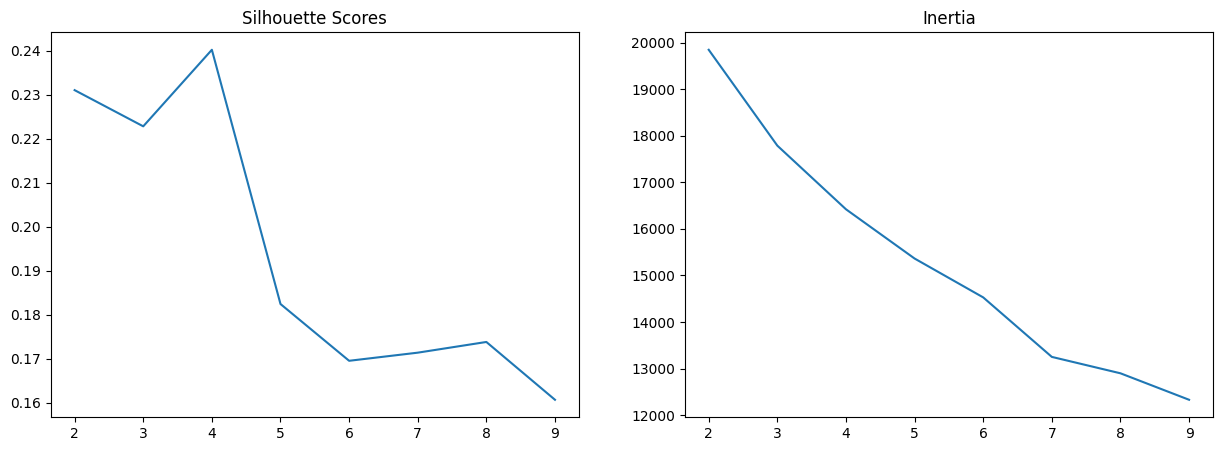

In [390]:
# Lo que hacemos ahora es crear el grafico del codo y el de silluete para saber el numero de clusteres optimos.

ks = range(2,10)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [391]:
# Aplicamos el modelo de KMeans con 4 clusters.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Agregamos el numero de clusteres al dataframe en su propia columna.
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method,cluster
0,1,0,0,2010,12,1,39,2,2,3,1
1,0,1,0,2009,3,0,83,1,1,2,3
2,0,1,0,2010,2,0,60,1,1,2,3
3,0,1,0,2011,1,0,73,1,1,2,3
4,1,0,0,2009,8,0,51,2,1,1,1


In [392]:
# Lo que hacemos ahora, es que agrupamos el dataframe de acuerdo a los clusters (los 4 escogidos) y hacemos que nos muestre el promedio de cada columna (esto es para
# tener una idea mas general de los valores).

cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,0,0.717742,0.427419,0.459677,2010.137097,6.362903,0.419355,33.250000,2.008065,5.580645,2.048387
1,1,0.999100,0.073807,0.000000,2010.037804,6.471647,0.565257,45.600360,1.795680,1.306031,1.459046
2,2,0.932806,0.150198,1.280632,2009.972332,5.873518,0.569170,42.201581,2.067194,1.588933,1.743083
3,3,0.108957,1.000000,0.053555,2010.060018,6.212373,0.465374,64.498615,0.765466,1.094183,1.546630


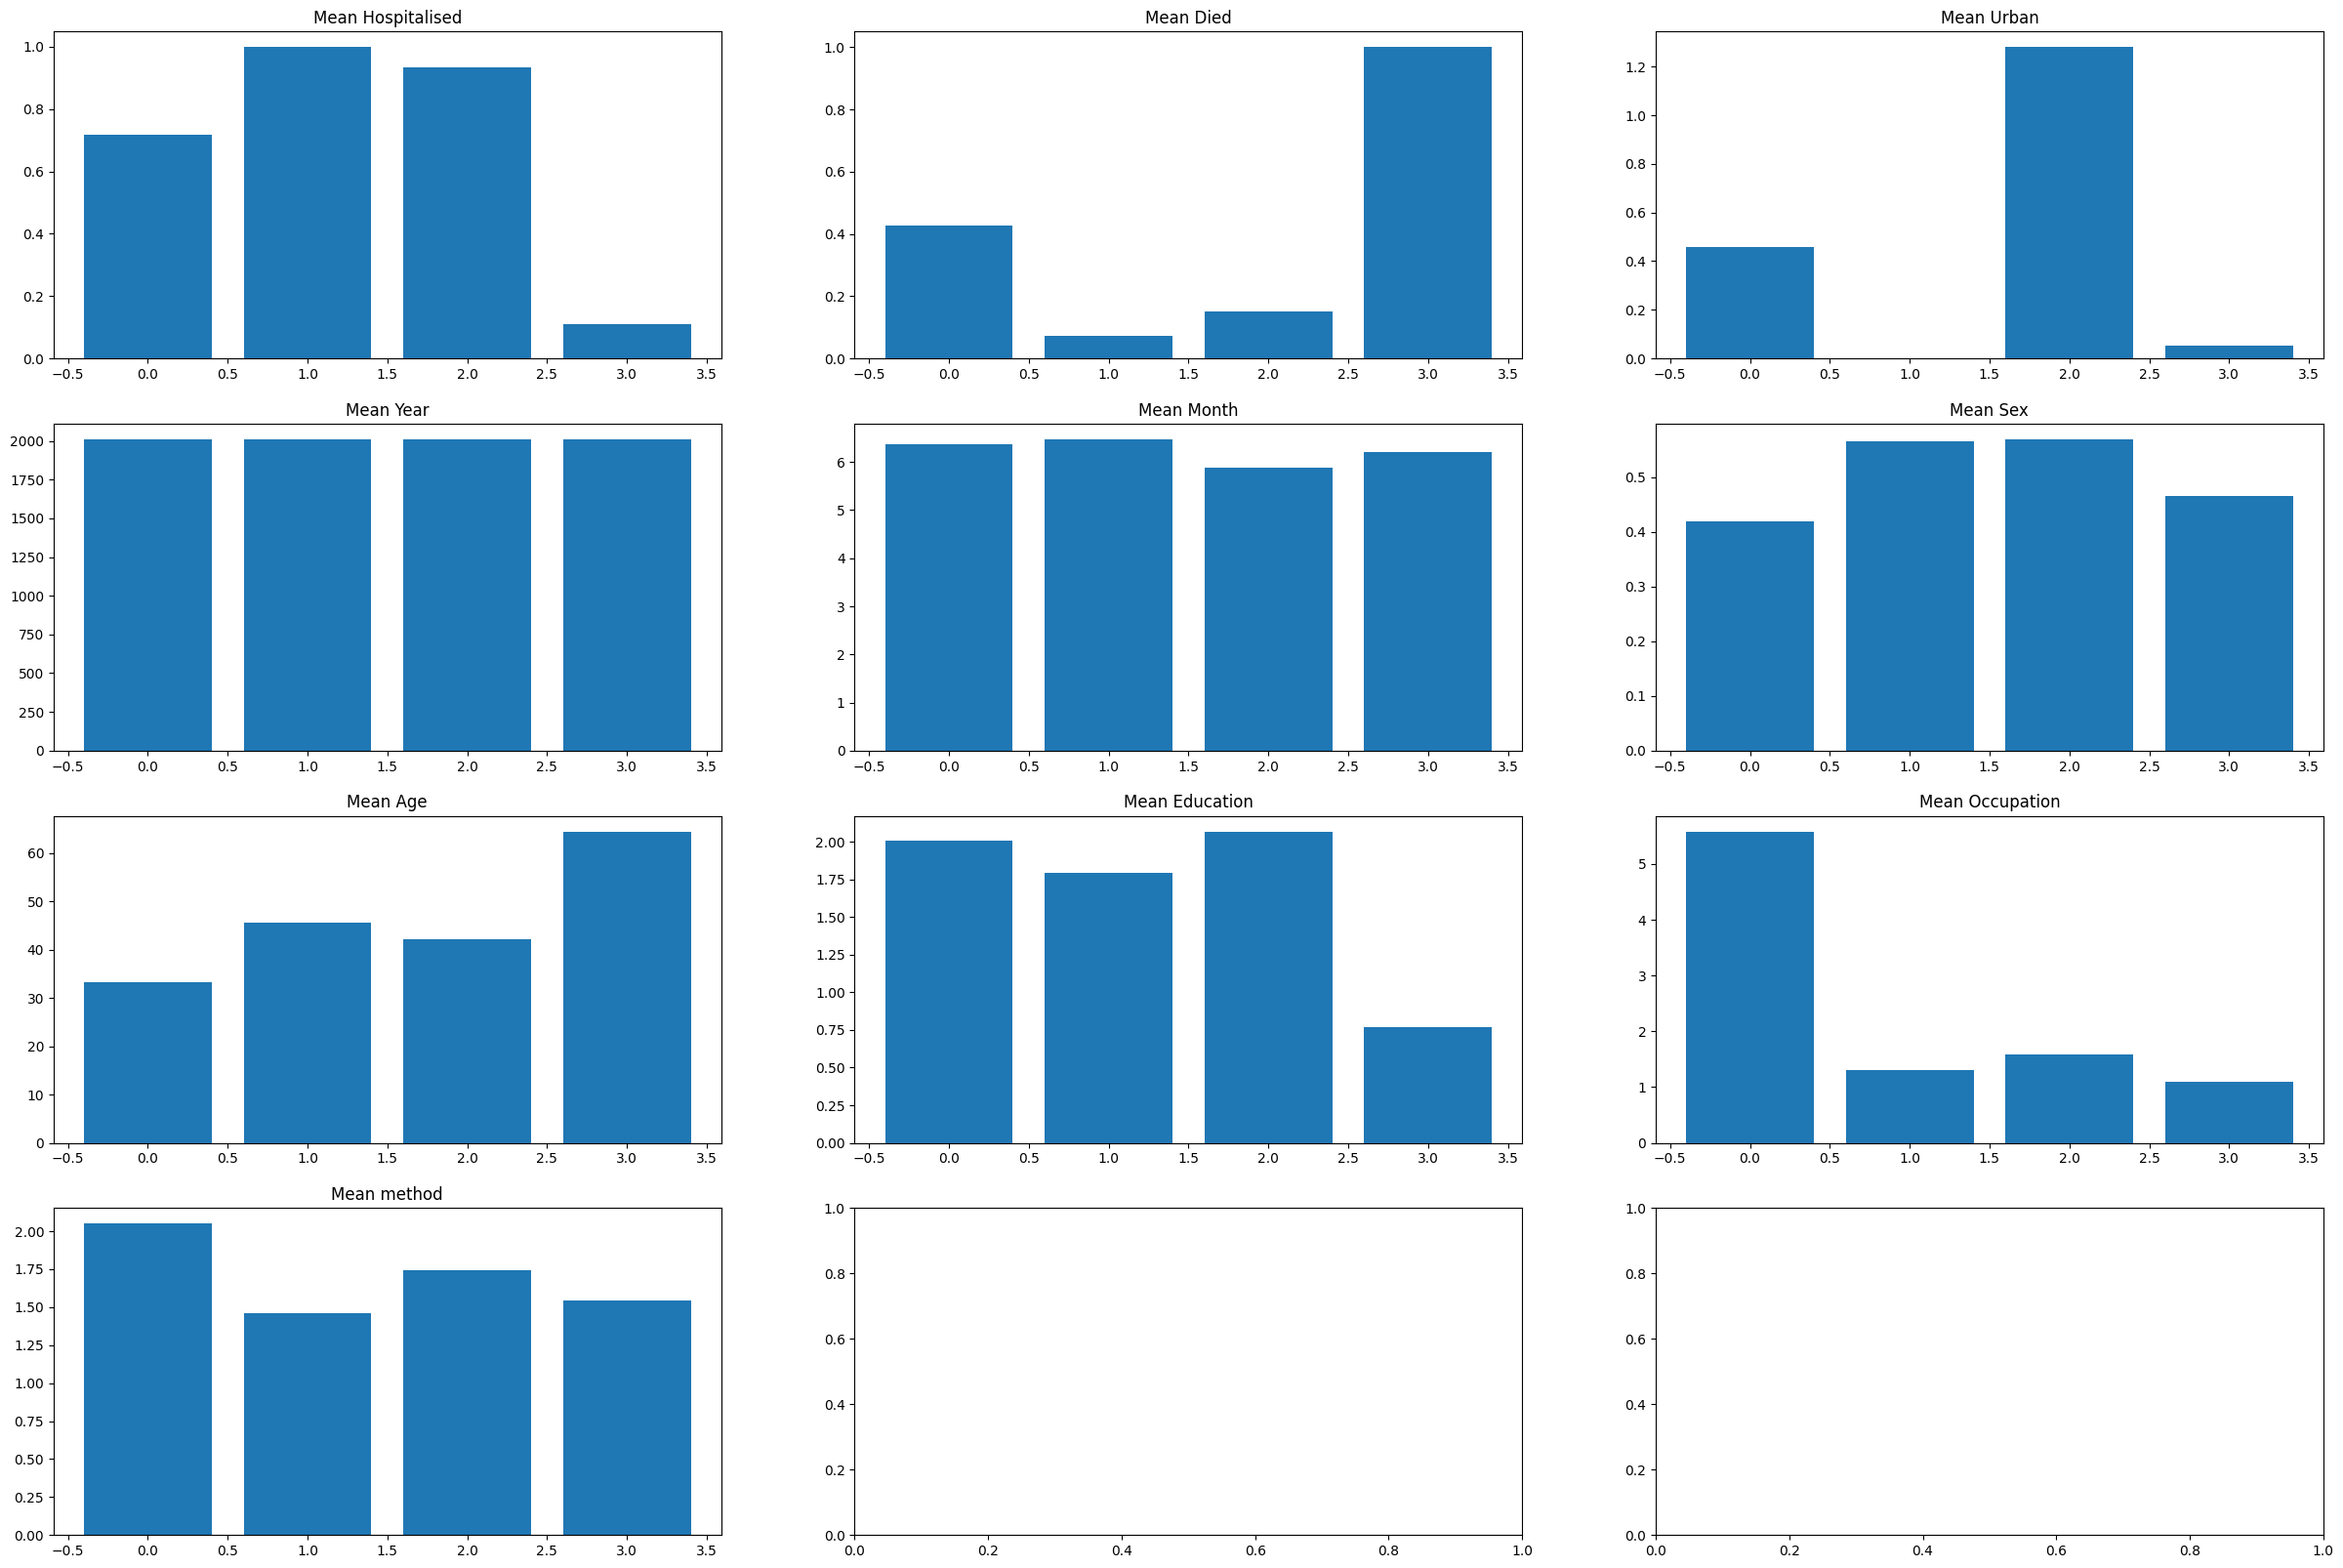

In [393]:
# Graficamos los clusteres obtenidos.

fig, axes = plt.subplots(4,3, figsize = (30, 20))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [394]:
# Esto es algo bien extraño. Da para investigar el hecho de que el modelo nos arroje 4 clusters como optimo, porque esto
# significa que hay dos grupos que no estamos viendo. O sea que hay dos alternativas aparte de si fallecio o no en
# nuestro dataset. En los graficos anteriores podemos comprender como se comportan los clusters por cada variable.

In [395]:
" ===================== Cuarto Modelo: Regresión Logística ===================== "

' ===================== Cuarto Modelo: Regresión Logística ===================== '

In [396]:
# Correré la base de datos de nuevo y todo lo modificado para comenzar a trabajar con el otro modelo.

# Cargamos la base de datps
df = pd.read_csv("/content/SuicideChina.csv")

# Eliminamos las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

# Cambiamos las columnas que son categoricas como valores numericos:

# Si fue Hospitalizado o no
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

# Si falleció o no
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

# si vivia en una zona urbana o rural
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

# De qué genero era
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

# La educación que tenía
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

# A qué se dedicaba
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

# El metodo que escogio para cometer suicidio (o intento de suicidio)
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [397]:
# 1) Separación

X = df.drop(columns = 'Died')
y = df['Died']

In [398]:
# Aplicamos el train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [399]:
# Escalar los datos

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [400]:
# Creamos un pipeline. Ya escalamos los datos y este paso es bueno para evitar fugas.

transformer = make_pipeline(StandardScaler())

In [401]:
# Un pipeline dentro de otro añadiendole la regresion logistica.

logreg = LogisticRegression()
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('logisticregression', LogisticRegression())])

In [402]:
# Ahora obtenemos el resultado del modelo.

print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.9164937759336099
Testing accuracy: 0.8864696734059098


In [403]:
# No se ve que este sobreajustado y tampoco es un mal resultado,
# de hecho, todo lo contrario, es uno de los mejores modelos que tenemos hasta el momento.

In [404]:
" ===================== Quinto Modelo: Redes Neuronales ===================== "

' ===================== Quinto Modelo: Redes Neuronales ===================== '

In [405]:
# Correré la base de datos de nuevo y todo lo modificado para comenzar a trabajar con el otro modelo.

# Cargamos la base de datps
df = pd.read_csv("/content/SuicideChina.csv")

# Eliminamos las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

# Cambiamos las columnas que son categoricas como valores numericos:

# Si fue Hospitalizado o no
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

# Si falleció o no
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

# si vivia en una zona urbana o rural
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

# De qué genero era
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

# La educación que tenía
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

# A qué se dedicaba
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

# El metodo que escogio para cometer suicidio (o intento de suicidio)
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [406]:
# 1) Separación

X = df.drop(columns = 'Died')
y = df['Died']

In [407]:
# 2) Aplicamos el train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [408]:
# 3) Escalar

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [409]:
# 4) Debemos definir nuestra estructura de red. Tenemos 9 columnas (10 menos el vector objetivo), por lo que
# ese será el maximo de neuronas en la primera capa.

input_shape = X_train.shape[1]
input_shape

9

In [410]:
# Utilizaremos un modelo secuencial:

model = Sequential()

In [411]:
# Primera capa oculta
model.add(Dense(9, # Tengo 9 neuronas en mi primera capa
                input_dim = input_shape,
                activation = 'relu'))
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [412]:
# Paso 2: Compilar

model.compile(loss = 'bce', optimizer = 'adam')

In [413]:
# Paso 3: Ajustar el modelo

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
61/61 [==============================] - 1s 3ms/step - loss: 78.1014 - val_loss: 9.9798
Epoch 2/10
61/61 [==============================] - 0s 2ms/step - loss: 2.1881 - val_loss: 0.8066
Epoch 3/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7597 - val_loss: 0.7980
Epoch 4/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7658 - val_loss: 0.7655
Epoch 5/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7212 - val_loss: 0.6680
Epoch 6/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7070 - val_loss: 0.8020
Epoch 7/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6808 - val_loss: 0.6716
Epoch 8/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6286 - val_loss: 0.5798
Epoch 9/10
61/61 [==============================] - 0s 2ms/step - loss: 0.5672 - val_loss: 0.5341
Epoch 10/10
61/61 [==============================] - 0s 2ms/step - loss: 0.5984 - val_loss: 0.6147


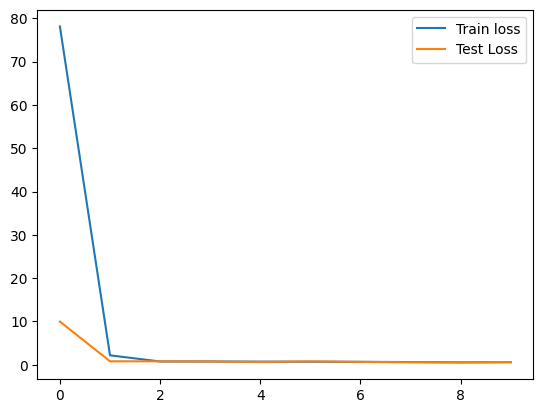

In [414]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [415]:
loss = model.evaluate(X_test, y_test)
loss

21/21 [==============================] - 0s 997us/step - loss: 0.6147


0.6147063374519348

In [416]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

21/21 [==============================] - 0s 910us/step


0.9118541033434651

In [417]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

21/21 [==============================] - 0s 788us/step


0.6811819595645412

In [418]:
# ===== Segunda version de redes neuronales =====

In [419]:
# Primera capa oculta
model.add(Dense(9, # Tengo 9 neuronas en mi primera capa
                input_dim = input_shape,
                activation = 'relu'))
# Segunda capa oculta
model.add(Dense(7, # Tengo 4 neuronas en mi segunda capa.
                activation = 'relu'))
# Tercera capa oculta
model.add(Dense(4, # Tengo 4 neuronas en mi segunda capa.
                activation = 'relu'))
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [420]:
# Paso 2: Compilar

model.compile(loss = 'bce', optimizer = 'adam')

In [421]:
# Paso 3: Ajustar el modelo

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
61/61 [==============================] - 1s 10ms/step - loss: 0.6927 - val_loss: 0.6943
Epoch 2/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6925 - val_loss: 0.6943
Epoch 3/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6925 - val_loss: 0.6943
Epoch 4/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6925 - val_loss: 0.6949
Epoch 5/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6925 - val_loss: 0.6949
Epoch 6/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6926 - val_loss: 0.6950
Epoch 7/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6925 - val_loss: 0.6948
Epoch 8/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6925 - val_loss: 0.6947
Epoch 9/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6925 - val_loss: 0.6945
Epoch 10/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6925 - val_loss: 0.6946


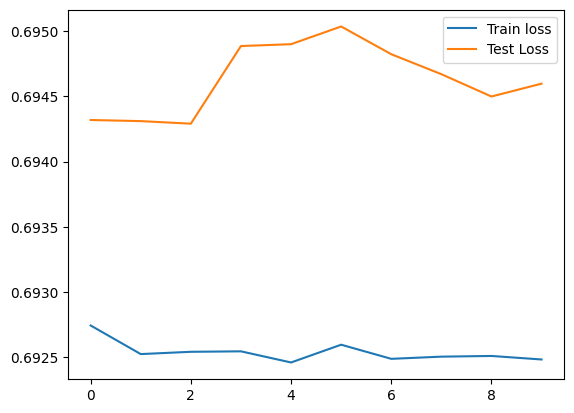

In [422]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [423]:
loss = model.evaluate(X_test, y_test)
loss

21/21 [==============================] - 0s 982us/step - loss: 0.6946


0.6945972442626953

In [424]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

21/21 [==============================] - 0s 975us/step


0.0

In [425]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

21/21 [==============================] - 0s 872us/step


0.48833592534992226

In [426]:
# ===== Tercera version de redes neuronales =====

In [427]:
# Agregamos una regularizacion

model = keras.Sequential([
    layers.Dense(9,
                 input_dim=input_shape,
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(4,
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1,
                 activation='sigmoid')
])

In [428]:
# Paso 2: Compilar

model.compile(loss = 'bce', optimizer = 'adam')

In [429]:
# Paso 3: Ajustar el modelo

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
61/61 [==============================] - 1s 4ms/step - loss: 109.0428 - val_loss: 77.0326
Epoch 2/10
61/61 [==============================] - 0s 2ms/step - loss: 50.9867 - val_loss: 34.1586
Epoch 3/10
61/61 [==============================] - 0s 2ms/step - loss: 19.0871 - val_loss: 6.6066
Epoch 4/10
61/61 [==============================] - 0s 2ms/step - loss: 1.5429 - val_loss: 0.7806
Epoch 5/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7819 - val_loss: 0.7711
Epoch 6/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7731 - val_loss: 0.7637
Epoch 7/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7661 - val_loss: 0.7578
Epoch 8/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7605 - val_loss: 0.7532
Epoch 9/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7559 - val_loss: 0.7495
Epoch 10/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7522 - val_loss: 0.7465


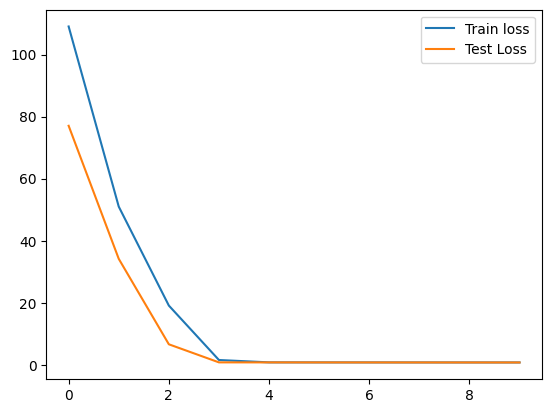

In [430]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [431]:
loss = model.evaluate(X_test, y_test)
loss

21/21 [==============================] - 0s 1ms/step - loss: 0.7465


0.7464838027954102

In [432]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

21/21 [==============================] - 0s 875us/step


1.0

In [433]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

21/21 [==============================] - 0s 922us/step


0.5116640746500778